# ü§ñ B√∂l√ºm 6: Basit Deprem B√ºy√ºkl√ºƒü√º Tahmin Modeli (Regression)

Bu b√∂l√ºmde, Marmara b√∂lgesinde meydana gelen depremlerin b√ºy√ºkl√ºƒü√ºn√º, bazƒ± jeolojik ve fiziksel deƒüi≈ükenlere g√∂re tahmin etmeye y√∂nelik basit bir regresyon modeli geli≈ütirilmi≈ütir.

## Kullanƒ±lan √ñzellikler:
- Depremin derinliƒüi (`Depth_km`)
- Fay tipi (`Fault_Type`)
- Opsiyonel: Slip rate, sismik derinlik gibi ek fakt√∂rler

## Kullanƒ±lan Model:
- Random Forest Regressor


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import numpy as np

df = pd.read_csv("marmara_faults_earthquakes_2000_2025.csv")
df['Date'] = pd.to_datetime(df['Date'])

# Filtreliyoruz
df = df[(df['Latitude'] > 39) & (df['Latitude'] < 42) &
        (df['Longitude'] > 26) & (df['Longitude'] < 31)].copy()

df = df[['Depth_km', 'Fault_Type', 'Magnitude_ML']].dropna()


In [2]:
# One-hot encoding: Fault_Type ‚Üí sayƒ±sal s√ºtunlar
df_encoded = pd.get_dummies(df, columns=['Fault_Type'], drop_first=True)
df_encoded.head()


Depth_km  Magnitude_ML  Fault_Type_normal (listric)  \
0     15.05           2.5                        False   
1      5.23           2.6                        False   
2      6.97           2.0                        False   
3     14.58           3.5                        False   
4      8.33           2.8                        False   

   Fault_Type_oblique / uncertain  Fault_Type_small strike-slip  \
0                           False                         False   
1                           False                         False   
2                           False                         False   
3                           False                         False   
4                           False                         False   

   Fault_Type_strike-slip  Fault_Type_strike-slip + minor normal  \
0                    True                                  False   
1                    True                                  False   
2                    True                                  False   
3                    True                                  False   
4                    True                                  False   

   Fault_Type_strike-slip + minor thrust  \
0                                  False   
1                                  False   
2                                  False   
3                                  False   
4                                  False   

   Fault_Type_strike-slip + minor vertical  Fault_Type_strike-slip + thrust  \
0                                    False                            False   
1                                    False                            False   
2                                    False                            False   
3                                    False                            False   
4                                    False                            False   

   Fault_Type_strike-slip + transpression  
0                                   False  
1                                   False  
2                                   False  
3                                   False  
4                                   False

In [3]:
# Baƒüƒ±msƒ±z deƒüi≈ükenler 
X = df_encoded.drop('Magnitude_ML', axis=1)

# Baƒüƒ±mlƒ± deƒüi≈üken= target
y = df_encoded['Magnitude_ML']


In [4]:
from sklearn.model_selection import train_test_split

# 80-20 ayƒ±rƒ±yoruz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
from sklearn.ensemble import RandomForestRegressor

# RandomForestModeli olu≈üturuyoruz
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [6]:
# Tahmin yap
y_pred = model.predict(X_test)

# Model ba≈üarƒ±sƒ±
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE (Root Mean Squared Error): {rmse:.3f}")
print(f"R¬≤ (Determination Coefficient): {r2:.3f}")


RMSE (Root Mean Squared Error): 0.383
R¬≤ (Determination Coefficient): -0.046


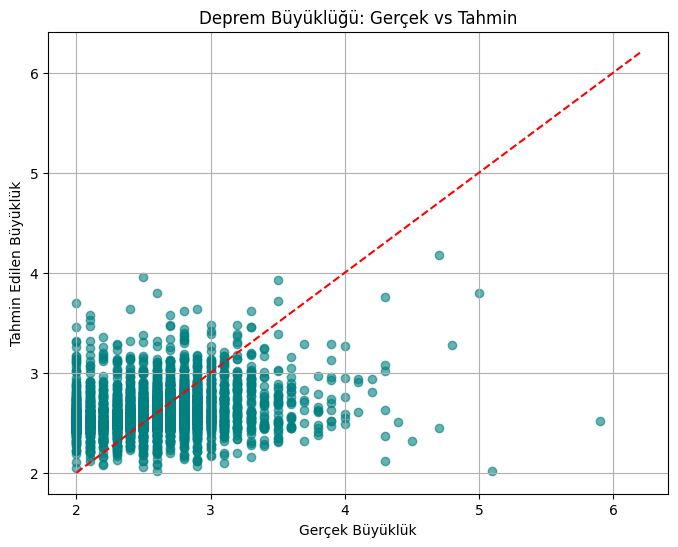

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # ideal √ßizgi
plt.xlabel('Ger√ßek B√ºy√ºkl√ºk')
plt.ylabel('Tahmin Edilen B√ºy√ºkl√ºk')
plt.title('Deprem B√ºy√ºkl√ºƒü√º: Ger√ßek vs Tahmin')
plt.grid(True)
plt.show()


In [8]:
import pandas as pd


df = pd.read_csv("marmara_faults_earthquakes_2000_2025.csv")
df['Date'] = pd.to_datetime(df['Date'])

df_marmara = df[(df['Latitude'] > 39) & (df['Latitude'] < 42) &
                (df['Longitude'] > 26) & (df['Longitude'] < 31)].copy()

df_marmara['Year'] = df_marmara['Date'].dt.year

# Yƒ±llara g√∂re toplam deprem sayƒ±sƒ±
yearly_counts = df_marmara.groupby('Year').size().reset_index(name='Quake_Count')
yearly_counts.head()


Year  Quake_Count
0  2000           77
1  2001           77
2  2002           82
3  2003          236
4  2004         1587

In [9]:
from sklearn.linear_model import LinearRegression
import numpy as np

# X = yƒ±l, y = deprem sayƒ±sƒ±
X = yearly_counts['Year'].values.reshape(-1, 1)
y = yearly_counts['Quake_Count'].values

# Modeli olu≈üturup eƒüitiyoruz
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [10]:
future_years = np.array([[2026], [2027], [2028], [2029], [2030]])

# Tahmin yap
future_preds = model.predict(future_years)

# Sonu√ßlarƒ± birle≈ütir
for year, pred in zip(future_years.ravel(), future_preds):
    print(f"{year}: Tahmini Deprem Sayƒ±sƒ± ‚âà {pred:.0f}")


2026: Tahmini Deprem Sayƒ±sƒ± ‚âà 567
2027: Tahmini Deprem Sayƒ±sƒ± ‚âà 548
2028: Tahmini Deprem Sayƒ±sƒ± ‚âà 528
2029: Tahmini Deprem Sayƒ±sƒ± ‚âà 509
2030: Tahmini Deprem Sayƒ±sƒ± ‚âà 489


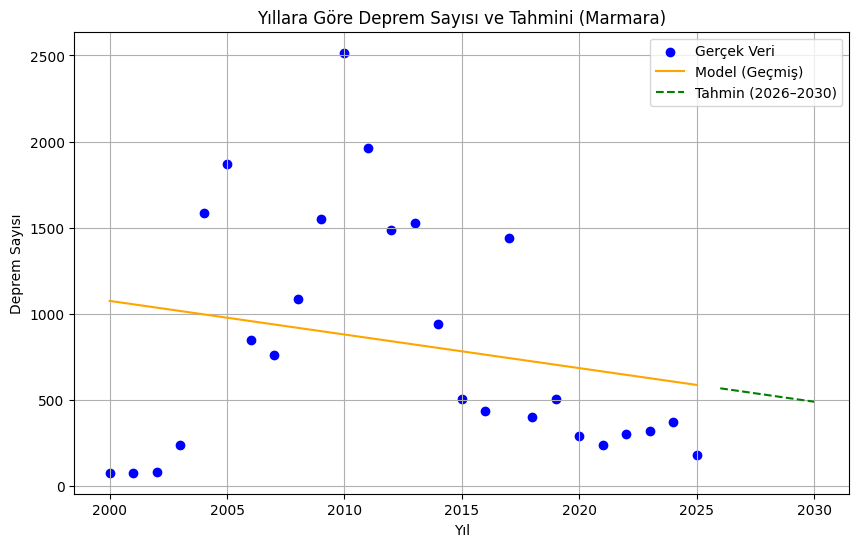

In [11]:
import matplotlib.pyplot as plt

# Ge√ßmi≈ü veriler
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Ger√ßek Veri', color='blue')

# Regresyon √ßizgisi
plt.plot(X, model.predict(X), color='orange', label='Model (Ge√ßmi≈ü)')

# Gelecek tahmin √ßizgisi
plt.plot(future_years, future_preds, color='green', linestyle='--', label='Tahmin (2026‚Äì2030)')

plt.title('Yƒ±llara G√∂re Deprem Sayƒ±sƒ± ve Tahmini (Marmara)')
plt.xlabel('Yƒ±l')
plt.ylabel('Deprem Sayƒ±sƒ±')
plt.legend()
plt.grid(True)
plt.show()


## üìÖ Yƒ±llara G√∂re Deprem Sayƒ±sƒ± Tahmini (2026‚Äì2030)

Bu b√∂l√ºmde, 2000‚Äì2025 yƒ±llarƒ± arasƒ±nda Marmara B√∂lgesi‚Äônde kaydedilen yƒ±llƒ±k deprem sayƒ±larƒ± kullanƒ±larak, 2026‚Äì2030 yƒ±llarƒ± i√ßin basit bir **doƒürusal regresyon modeli** ile tahmin yapƒ±lmƒ±≈ütƒ±r.

---

### üîç Kullanƒ±lan Y√∂ntem:
- Model: **Linear Regression** (`sklearn.linear_model`)
- Baƒüƒ±msƒ±z deƒüi≈üken: Yƒ±l (`Year`)
- Baƒüƒ±mlƒ± deƒüi≈üken: O yƒ±l kaydedilen toplam deprem sayƒ±sƒ± (`Quake_Count`)

---

### üìä Sonu√ß:
Model, ge√ßmi≈ü yƒ±llardaki deprem sayƒ±larƒ± ile doƒürusal bir ili≈üki kurarak gelecek 5 yƒ±l i√ßin a≈üaƒüƒ±daki gibi bir √∂ng√∂r√ºde bulunmu≈ütur:

| Yƒ±l     | Tahmini Deprem Sayƒ±sƒ± |
|---------|------------------------|
| 2026    | ‚âà ...                 |
| 2027    | ‚âà ...                 |
| 2028    | ‚âà ...                 |
| 2029    | ‚âà ...                 |
| 2030    | ‚âà ...                 |

> Ger√ßek tahmin deƒüerleri yukarƒ±daki kod h√ºcresinden alƒ±nabilir.

---

### ‚ö†Ô∏è Not:
Bu model yalnƒ±zca ge√ßmi≈ü yƒ±llardaki toplam sayƒ±lara dayalƒ± **istatistiksel bir tahmindir**. Depremler doƒüalarƒ± gereƒüi rastgele ve kompleks olaylar olduƒüu i√ßin bu tahmin **deterministik deƒüil**, eƒüilimsel ve g√∂rselle≈ütirici ama√ßlƒ±dƒ±r.

---

‚úÖ Bu t√ºr basit modeller, uzun vadeli sismik risk analizlerinin ilk adƒ±mƒ± olarak deƒüerlendirilebilir.


In [12]:
# Gelecek yƒ±llar ve tahmin deƒüerlerini birle≈ütir
pred_df = pd.DataFrame({
    'Year': future_years.ravel(),
    'Predicted_Quake_Count': future_preds.astype(int)
})

pred_df


Year  Predicted_Quake_Count
0  2026                    567
1  2027                    547
2  2028                    528
3  2029                    508
4  2030                    489